# Sorting functions in python

Python is useful for exploring algorithms because of its terseness and large set of libraries.

This post will be focused on sorting functions, using a set of shuffled cards (integers) as input and looking at measured runtime.

In [23]:
import random

cards = range(52)
random.shuffle(cards)
print cards

[21, 20, 22, 26, 24, 8, 25, 30, 49, 36, 11, 48, 31, 28, 29, 41, 6, 23, 33, 42, 32, 10, 0, 16, 7, 46, 19, 14, 18, 38, 15, 27, 37, 12, 51, 43, 34, 35, 13, 1, 3, 39, 9, 50, 17, 44, 45, 4, 47, 2, 5, 40]


Before we begin, let's define a function for checking that our sorting function even works. We can call it assert_sorted: 

In [24]:
def assert_sorted(cards):
    current_min = -1
    for card in cards:
        if card < current_min:
            raise AssertionError('Sort Failed')
        current_min = card
    return True

### Selection Sort

In [25]:
def selection_sort(cards):
    sorted = []
    search_space = list(cards)
    while (len(sorted) < len(cards)):
        current_min_index = 0
        for i in range(len(search_space)):
            if search_space[i]  < search_space[current_min_index]:
                current_min_index = i
        sorted.append(search_space.pop(current_min_index))
    return sorted 

In [26]:
print selection_sort(cards)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]


Let's look at the performance of selection sort. I looked into cProfile as a way to profile, but I only needed performance in the time dimension, not in the variety of execution functions cProfile was giving me. So I decided instead to use a very simple way of profiling execution time: using the python time library.

I can then plot the runtime in seconds as the numer of cards I input grows. 

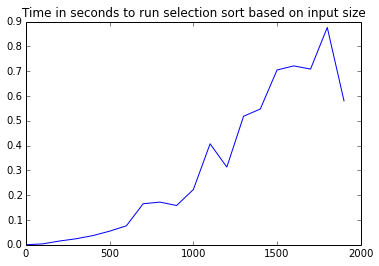

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import time

sizes = [x for x in range(2000) if x % 100 == 0]
durations = []

for size in sizes:
    cards = range(size)
    random.shuffle(cards)
    start_time = time.time()
    sorted_cards = selection_sort(cards)
    durations.append(time.time() - start_time)
    assert_sorted(sorted_cards)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(sizes, durations)
plt.title('Time in seconds to run selection sort based on input size')
plt.show()

### Insertion Sort

In [28]:
def insertion_sort(cards):
    sorted = []
    for candidate in cards:
        # by default, insert at the end of the sorted list
        index = len(sorted)
        for i in range(len(sorted)):
            if candidate < sorted[i]:
                index = i
                break
        sorted.insert(index, candidate)
    return sorted

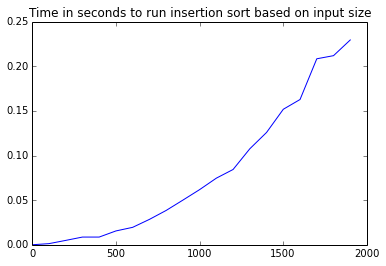

In [29]:
sizes = [x for x in range(2000) if x % 100 == 0]
durations = []

for size in sizes:
    cards = range(size)
    random.shuffle(cards)
    start_time = time.time()
    sorted_cards = insertion_sort(cards)
    durations.append(time.time() - start_time)
    assert_sorted(sorted_cards)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(sizes, durations)
plt.title('Time in seconds to run insertion sort based on input size')
plt.show()

### Insertion sort with a tree structure

This is how non-computer scientist friends of mine describe how they like to sort their cards. It's insertion sort, but we store the sorted cards in a tree so that inserts can happen in log(N) instead of N.

In [30]:
import bintrees
def insertion_sort_with_trees(cards, tree):
    for candidate in cards:
        # by default, insert only the key into the bintree. Value is None
        tree.insert(candidate, None)
    return [x for x in tree.keys()]

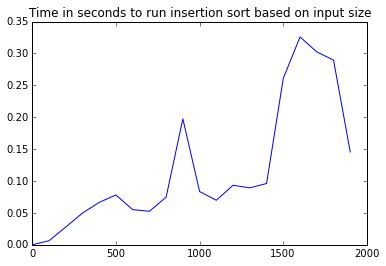

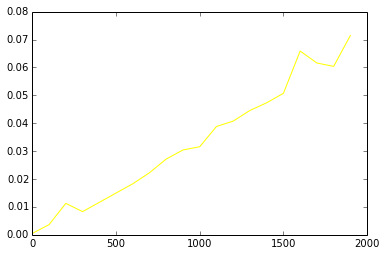

In [31]:
sizes = [x for x in range(2000) if x % 100 == 0]
durations = []

for size in sizes:
    cards = range(size)
    random.shuffle(cards)
    redblack_tree = bintrees.RBTree()
    start_time = time.time()
    sorted_cards = insertion_sort_with_trees(cards, redblack_tree)
    durations.append(time.time() - start_time)
    assert_sorted(sorted_cards)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(sizes, durations)
plt.title('Time in seconds to run insertion sort based on input size')
plt.show()
durations = []

for size in sizes:
    cards = range(size)
    random.shuffle(cards)
    binaryTree = bintrees.BinaryTree()
    start_time = time.time()
    sorted_cards = insertion_sort_with_trees(cards, binaryTree)
    durations.append(time.time() - start_time)
    assert_sorted(sorted_cards)
    
plt.plot(sizes, durations, color = 'yellow')


Downsides of binary tree: it performs well in the best case, but because it isn't balanced, it's worst case performance takes you back to performance as bad as insertion sort, O(N^2)

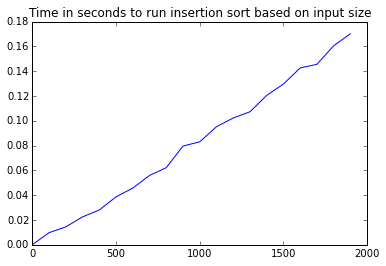

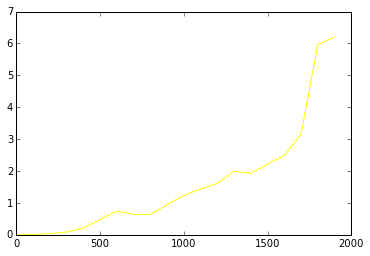

In [32]:
sizes = [x for x in range(2000) if x % 100 == 0]
durations = []

for size in sizes:
    cards = range(size)
    redblack_tree = bintrees.RBTree()
    start_time = time.time()
    sorted_cards = insertion_sort_with_trees(cards, redblack_tree)
    durations.append(time.time() - start_time)
    assert_sorted(sorted_cards)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(sizes, durations)
plt.title('Time in seconds to run insertion sort based on input size')
plt.show()
durations = []

for size in sizes:
    cards = range(size)
    binaryTree = bintrees.BinaryTree()
    start_time = time.time()
    sorted_cards = insertion_sort_with_trees(cards, binaryTree)
    durations.append(time.time() - start_time)
    assert_sorted(sorted_cards)
    
plt.plot(sizes, durations, color = 'yellow')


You can see that because the rbtree remains balanced, insertion into it is stabler (blue line). Whereas the binary tree (yellow line) has O(N^2) performance. It looks very similar to our insertion sort from earlier, because we have lost the benefits of storing the sorted array in a tree.

### Quicksort

In [33]:
def quicksort(cards):
    if len(cards) < 2:
        return cards
    pivot = random.randint(0, len(cards) - 1)
    upper_half = [x for x in cards if x >= cards[pivot]]
    lower_half = [x for x in cards if x < cards[pivot]]
    return quicksort(lower_half) + quicksort(upper_half)
    

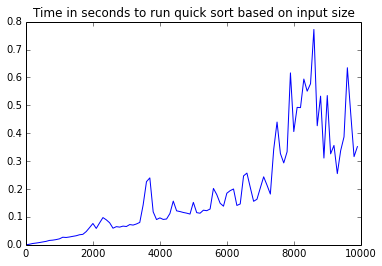

In [34]:
sizes = [x for x in range(10000) if x % 100 == 0]
durations = []

for size in sizes:
    cards = range(size)
    random.shuffle(cards)
    start_time = time.time()
    sorted_cards = quicksort(cards)
    durations.append(time.time() - start_time)
    assert_sorted(sorted_cards)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(sizes, durations)
plt.title('Time in seconds to run quick sort based on input size')
plt.show()


### Mergesort

Mergesort is similar to quicksort, in that it uses recursion to only have to do NlogN compares. First divide the list into the smallest unit, then compare each element with the adjacent list to sort and merge the adjacent list. 

I found that the code for mergesort is a little bit more complex that I would like, so I have taken this gif from wikipedia to demonstrate what's really going on here:
![merge](https://upload.wikimedia.org/wikipedia/commons/c/cc/Merge-sort-example-300px.gif)

In [35]:
def mergesort(cards):
    if len(cards) <= 1:
        return cards
    else:
        return merge(mergesort(cards[:len(cards)/2]), mergesort(cards[len(cards)/2:]))

def merge(list1, list2):
    final_list = []
    i = 0
    j = 0
    while len(final_list) != (len(list1)) + len(list2):
        if i == len(list1):
            final_list.append(list2[j])
            j = j + 1
        elif j == len(list2) or list1[i] < list2[j]:
            final_list.append(list1[i])
            i = i + 1
        elif list1[i] >= list2[j]:
            final_list.append(list2[j])
            j = j + 1
    return final_list

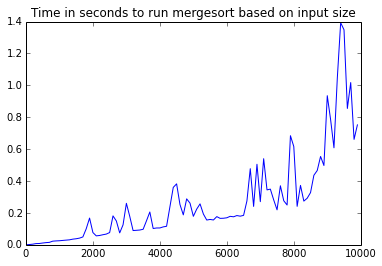

In [36]:
sizes = [x for x in range(10000) if x % 100 == 0]
durations = []

for size in sizes:
    cards = range(size)
    random.shuffle(cards)
    start_time = time.time()
    sorted_cards = mergesort(cards)
    durations.append(time.time() - start_time)
    assert_sorted(sorted_cards)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(sizes, durations)
plt.title('Time in seconds to run mergesort based on input size')
plt.show()

Notice that quicksort barely defeats mergesort, and that using a btree with insertion isn't much slower. 

This has been an incomplete and much too fast exploration through the world of sorting algorithms! Read more on sorting functions on wikipedia, or download the python notebook files so you can run it on your own computer. 